In [19]:
import os

import requests
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

# AirVisual

Notes:

- stations are updated only once an hour, so cache data
- example city page: https://www.airvisual.com/pakistan/punjab/lahore

first up, loading in the keys needed:

In [73]:
AV_URL = "http://api.airvisual.com/v2/"
AV_URL_CITY = "https://api.airvisual.com/v2/city"

AV_KEY = os.getenv(key="AIRVISUAL")

if type(AV_KEY) != str:
    print("Key not loaded")

### Now to make a list of all the cities in Pakistan

In [74]:
payload = {'country': 'Pakistan', "key": AV_KEY}

r = requests.get(AV_URL+"states", params=payload)

if r.ok:
    data = r.json()["data"]

states = [x['state'] for x in data]
states

['Islamabad', 'Punjab', 'Sindh']

In [75]:
cities = {}

for state in states:
    payload = {"state":state,'country': 'Pakistan', "key": AV_KEY}

    r = requests.get(AV_URL+"cities", params=payload)
    if r.ok:
        for x in r.json()['data']:
            cities[x["city"]] = state

cities

{'Islamabad': 'Islamabad',
 'Bahawalpur': 'Punjab',
 'Faisalabad': 'Punjab',
 'Lahore': 'Punjab',
 'Rawalpindi': 'Punjab',
 'Karachi': 'Sindh'}

### Now to test if we can get data back from AirVisual:

In [76]:
def get_city_data(city="Lahore"):

    payload = {'city': city, 'state': 'Punjab', 
               'country': 'Pakistan', "key": AV_KEY}

    r = requests.get(AV_URL_CITY, params=payload)

    if r.json()['status'] == "success":
        data = r.json()["data"]
    else:
        print("Implement backup option to grab earlier data")
        data = "Fail"
    
    return data

data = get_city_data()
data.keys()

dict_keys(['city', 'state', 'country', 'location', 'forecasts', 'forecasts_daily', 'current', 'history'])

So we have the last 44 pollution events:

In [112]:
print("Pollution history length: ", len(data['history']['pollution']))

data['history']['pollution'][0]

Pollution history length:  44


{'ts': '2018-11-20T02:00:00.000Z',
 'aqius': 612,
 'mainus': 'p2',
 'aqicn': 720,
 'maincn': 'p2',
 'p2': {'conc': 670.5, 'aqius': 612, 'aqicn': 720}}

ts 2018-11-20T02:00:00.000Z
aqius 612
mainus p2
aqicn 720
maincn p2
p2 {'conc': 670.5, 'aqius': 612, 'aqicn': 720}


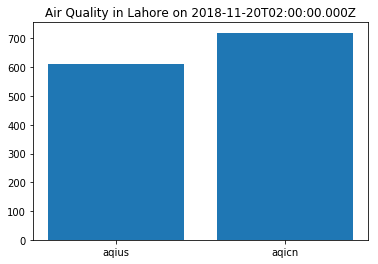

In [100]:
x, y = [], []

for key, val in data['current']['pollution'].items():
    print(key, val)
    if type(val) == int or type(val) == float:
        x.append(key)
        y.append(val)

plt.title(f"Air Quality in {data['city']} on {data['current']['pollution']['ts']}")
plt.bar(x,y);

Text(0.5,1,'Air Quality over time')

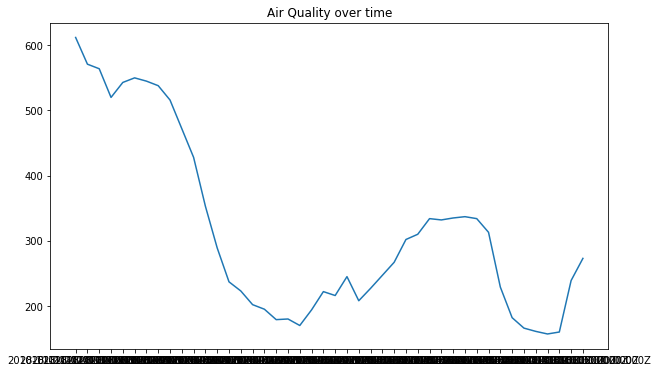

In [121]:
x, y = [], []

for p in data['history']['pollution']:
    x.append(p['ts'])
    y.append(p['aqius'])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y)
ax.set_title(f"Air Quality over time")